In [28]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 

import re
import string
import unicodedata

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from bs4 import BeautifulSoup

import os

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Case Normalization

In [92]:
"Hi, my name is Steve.".lower()
'I work at the U.N. in NYC in the USA.'.lower()

'hi, my name is steve.'

'i work at the u.n. in nyc in the usa.'

# Tokenization

For simple tokenzation, the NLTK docs recommend to just use `.split()`

In [106]:
"Hi, my name is Steve.".split()
"Let's go to the U.N. in NYC!!".split()
"The ever-popular San Fransisco love letter arrived on March 11, 2019.".split()
"stephen.thomas@queensu.ca".split()
"(613) 453-6162".split()

['Hi,', 'my', 'name', 'is', 'Steve.']

["Let's", 'go', 'to', 'the', 'U.N.', 'in', 'NYC!!']

['The',
 'ever-popular',
 'San',
 'Fransisco',
 'love',
 'letter',
 'arrived',
 'on',
 'March',
 '11,',
 '2019.']

['stephen.thomas@queensu.ca']

['(613)', '453-6162']

Can also use `nltk`'s `word_tokenize()` function.

In [107]:
from nltk import word_tokenize
word_tokenize("Hi, my name is Steve.")
word_tokenize("Let's go to the U.N. in NYC!!")
word_tokenize("The ever-popular San Fransisco love letter arrived on March 11, 2019.")
word_tokenize("stephen.thomas@queensu.ca")
word_tokenize("(613) 453-6162")

['Hi', ',', 'my', 'name', 'is', 'Steve', '.']

['Let', "'s", 'go', 'to', 'the', 'U.N.', 'in', 'NYC', '!', '!']

['The',
 'ever-popular',
 'San',
 'Fransisco',
 'love',
 'letter',
 'arrived',
 'on',
 'March',
 '11',
 ',',
 '2019',
 '.']

['stephen.thomas', '@', 'queensu.ca']

['(', '613', ')', '453-6162']

`nltk` even has a tokenizer for tweets!

In [93]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
s0 = "This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <--"
tknzr.tokenize(s0)

['This',
 'is',
 'a',
 'cooool',
 '#dummysmiley',
 ':',
 ':-)',
 ':-P',
 '<3',
 'and',
 'some',
 'arrows',
 '<',
 '>',
 '->',
 '<--']

# N-Grams

In [114]:
from nltk.util import ngrams
tokens = nltk.word_tokenize("Hey there, I am awesome.")

grams = ngrams(tokens,2)
for grams in grams:
  print(grams)

grams = ngrams(tokens,)
for grams in grams:
  print(grams)

('Hey', 'there')
('there', ',')
(',', 'I')
('I', 'am')
('am', 'awesome')
('awesome', '.')
('Hey', 'there', ',')
('there', ',', 'I')
(',', 'I', 'am')
('I', 'am', 'awesome')
('am', 'awesome', '.')


# Removing Characters

In [123]:
import re
s = "Hey! Let's go to the bar..."
re.sub(r'[^\w\s]', '', s)

'Hey Lets go to the bar'

In [169]:
import unidecode
s = u'Ábcdêãçoàúü'
unidecode.unidecode(s)

'Abcdeacoauu'

# Removing Numbers

In [125]:
import re
s = "There are only 4 classes left."
re.sub(r'\d+', '', s)

'There are only  classes left.'

# Regular Expressions

In [131]:
sentences = [
  "Alejandrina has a small store in her house where she sells basic products [such as soap, cooking oil, eggs, etc.] and stationary products. Alejandrina started her business with the help of her husband and with $. of capital. Translated from Spanish by Jennifer Day, Kiva Volunteer.",
  "Nancy works as a saleswoman, her main product being used clothing. She buys packs of clothes and resells them to friends and neighbors. She began her business with her family's help, who live abroad and sent her her first shipment of clothes. At the beginning, she only sold used clothing items. Now she sells new clothing as well as cosmetics.Translated from Spanish by Kiva Volunteer, Kristin Connor.",
  "Marjorie sells lunch to companies and construction workers. He started her business  years ago with the help of her sister who lent her money for starting up. Her sister also helped her to find customers. \r\n\r\nIn the beginning, she only sold lunch. Translated by Ramn F. Kolb."]

[re.sub(r'Translated[^\.]+\.', '', s) for s in sentences]

['Alejandrina has a small store in her house where she sells basic products [such as soap, cooking oil, eggs, etc.] and stationary products. Alejandrina started her business with the help of her husband and with $. of capital. ',
 "Nancy works as a saleswoman, her main product being used clothing. She buys packs of clothes and resells them to friends and neighbors. She began her business with her family's help, who live abroad and sent her her first shipment of clothes. At the beginning, she only sold used clothing items. Now she sells new clothing as well as cosmetics.",
 'Marjorie sells lunch to companies and construction workers. He started her business  years ago with the help of her sister who lent her money for starting up. Her sister also helped her to find customers. \r\n\r\nIn the beginning, she only sold lunch.  Kolb.']

# Stemming and Lemmatization

In [151]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer


words = ['caresses', 'flies', 'dies', 'mules', 'denied',
            'died', 'agreed', 'owned', 'humbled', 'sized',
            'meeting', 'stating', 'siezing', 'itemization',
            'sensational', 'traditional', 'reference', 'colonizer',
            'plotted', 'having', 'generously', 'owed', 'ear', 'crying',
            'she', 'her', 'he', 'his', 'they', 'thiers', 'mine']

res = pd.DataFrame()
res = res.assign(Orig=words)

stemmer = PorterStemmer()
res = res.assign(Porter=[stemmer.stem(w) for w in words])

stemmer = SnowballStemmer('english')
res = res.assign(Snowball=[stemmer.stem(w) for w in words])

stemmer = LancasterStemmer()
res = res.assign(Lancaster=[stemmer.stem(w) for w in words])

lemmer = WordNetLemmatizer()
res = res.assign(WordNetLemmatizer=[lemmer.lemmatize(w) for w in words])

res

,Orig,Porter,Snowball,Lancaster,WordNetLemmatizer
0,caresses,caress,caress,caress,caress
1,flies,fli,fli,fli,fly
2,dies,die,die,die,dy
3,mules,mule,mule,mul,mule
4,denied,deni,deni,deny,denied
5,died,die,die,died,died
6,agreed,agre,agre,agree,agreed
7,owned,own,own,own,owned
8,humbled,humbl,humbl,humbl,humbled
9,sized,size,size,siz,sized


# Spell Checking

In [163]:
%%time

from pattern.en import suggest

print(suggest(u'caar'))
print(suggest(u'mussage'))
print(suggest(u'survice'))
print(suggest(u'hte'))
print(suggest(u"wisky"))

[('car', 0.5), ('czar', 0.42857142857142855), ('saar', 0.07142857142857142)]
[('message', 0.6216216216216216), ('massage', 0.3783783783783784)]
[('service', 0.9253112033195021), ('survive', 0.07468879668049792)]
[('the', 0.8653201565642368), ('he', 0.13408515883485067), ('ate', 0.00022706139307570876), ('hate', 0.0002162489457863893), ('hue', 0.00012974936747183358), ('te', 1.0812447289319465e-05), ('htm', 1.0812447289319465e-05)]
[('whisky', 0.9333333333333333), ('risky', 0.06666666666666667)]
Wall time: 3.97 ms


# Stopping

In [166]:
from nltk.corpus import stopwords
tokens = nltk.word_tokenize("My name is Steve, and I am a good chef.".lower())
[t for t in tokens if t not in stopwords.words('english')]

['name', 'steve', ',', 'good', 'chef', '.']

# Removing Rare Words

# All-in-one

# Fuzzy Matching

# Vectorization

# Topic Modeling

In [29]:
%%time
in_dir = "C:/Users/st50/Documents/sandbox/data"
in_dir

Wall time: 0 ns


In [88]:
%%time
in_dir = "C:/Users/st50/Documents/sandbox/data"
in_dir

kiva_df=pd.read_csv(os.path.join(in_dir, "kiva.csv"))

kiva_df.dropna(inplace=True)
kiva_df['loan_amount'] = kiva_df['loan_amount'].astype('int')

kiva_df.rename(columns={'en':'story'}, inplace=True)
kiva_df['length'] = kiva_df['story'].apply(len)

kiva_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7882 entries, 0 to 7987
Data columns (total 8 columns):
status         7882 non-null object
sector         7882 non-null object
story          7882 non-null object
country        7882 non-null object
gender         7882 non-null object
loan_amount    7882 non-null int32
nonpayment     7882 non-null object
length         7882 non-null int64
dtypes: int32(1), int64(1), object(6)
memory usage: 523.4+ KB
Wall time: 156 ms


In [89]:
kiva_df.head()
kiva_df.describe()

,status,sector,story,country,gender,loan_amount,nonpayment,length
0,defaulted,Agriculture,<i>This description is written by Rowland Amul...,Kenya,M,500,lender,897
1,defaulted,Food,<i>This description is written by Rowland Amul...,Kenya,F,500,lender,1279
2,defaulted,Food,<i>This description was written by Richard Maz...,Kenya,M,500,lender,897
3,defaulted,Services,<i>This description was written by Rowland Amu...,Kenya,F,500,lender,737
4,defaulted,Construction,<i>This description was written by Rowland Amu...,Kenya,M,500,lender,798


,loan_amount,length
count,7882.000000,7882.000000
mean,708.324029,1037.417914
std,588.274723,730.269060
min,25.000000,87.000000
25%,350.000000,707.000000
50%,575.000000,908.000000
75%,925.000000,1162.000000
max,5000.000000,6694.000000


# EDA

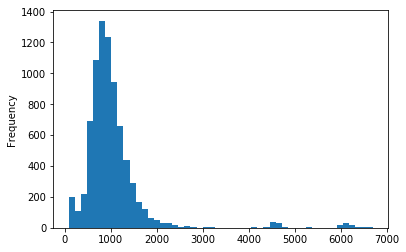

In [90]:
%matplotlib inline
color = sns.color_palette()

kiva_df['length'].plot(bins=50, kind='hist') 

Text(0.8,0,'2391')

Text(0.8,1,'1862')

Text(0.8,2,'1097')

Text(0.8,3,'1070')

Text(0.8,4,'813')

Text(0.8,5,'156')

Text(0.8,6,'143')

Text(0.8,7,'141')

Text(0.8,8,'87')

Text(0.8,9,'48')

Text(0.8,10,'35')

Text(0.8,11,'18')

Text(0.8,12,'14')

Text(0.8,13,'4')

Text(0.8,14,'3')

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text xticklabel objects>)

Text(0.5,0,'Number of loans were given')

Text(0,0.5,'Sector Name')

Text(0.5,1,'Top sectors in which more loans were given')

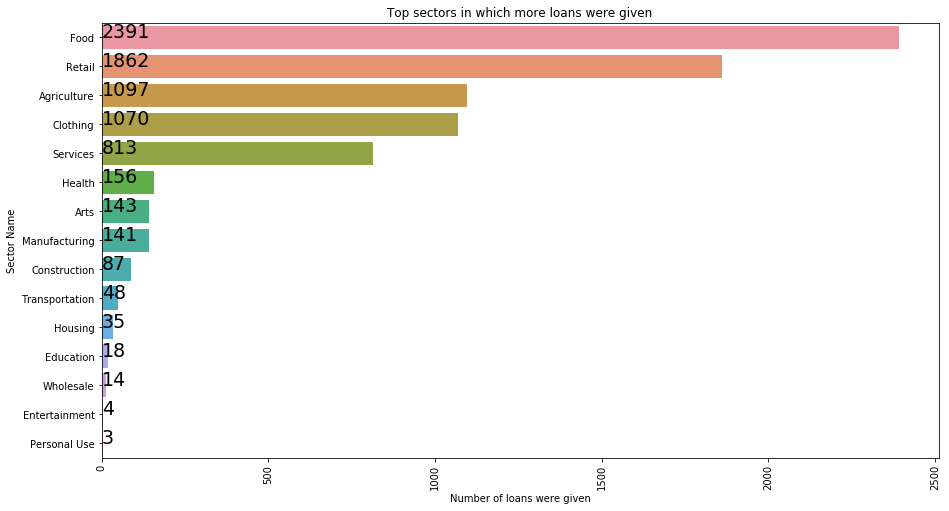

In [31]:
plt.figure(figsize=(15,8))
sector_name = kiva_df['sector'].value_counts()
sns.barplot(sector_name.values, sector_name.index)
for i, v in enumerate(sector_name.values):
    plt.text(0.8,i,v,color='k',fontsize=19)
plt.xticks(rotation='vertical')
plt.xlabel('Number of loans were given')
plt.ylabel('Sector Name')
plt.title("Top sectors in which more loans were given")
plt.show()
#Food is in the top sectors

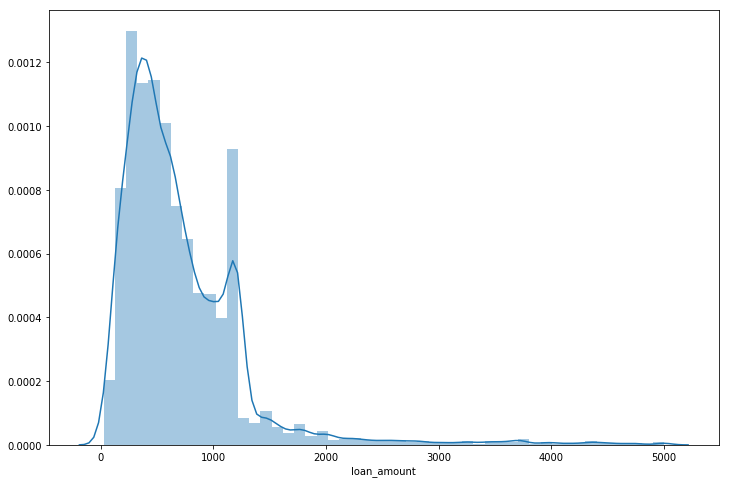

Text(0.5,0,'index')

Text(0,0.5,'loan_amount')

Text(0.5,1,'Loan Amount Distribution')

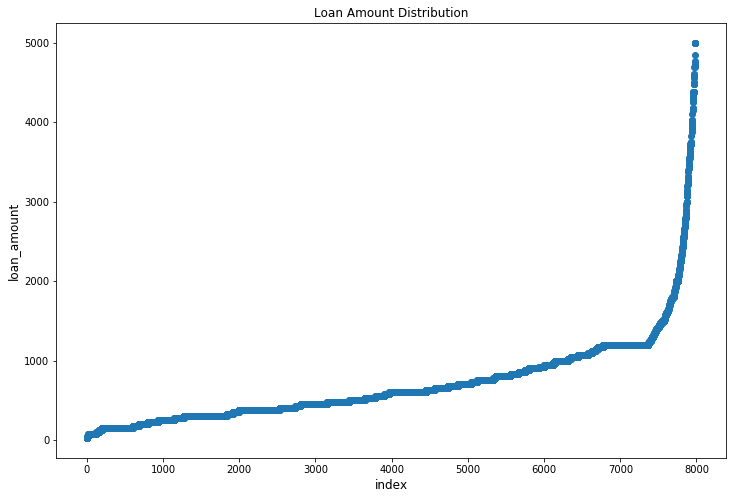

In [33]:
plt.figure(figsize = (12, 8))

sns.distplot(kiva['loan_amount'])
plt.show() 


plt.figure(figsize = (12, 8))
plt.scatter(range(kiva.shape[0]), np.sort(kiva.loan_amount.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('loan_amount', fontsize=12)
plt.title("Loan Amount Distribution")
plt.show()

# Model Development

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from scipy.sparse import hstack
from sklearn.preprocessing import LabelEncoder
labelencoder_0 = LabelEncoder() #independent variable encoder
encoder = LabelEncoder()
encoder.fit_transform(kiva_df['status'])

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [35]:
def review_to_words(raw_review):
    review_text = BeautifulSoup(raw_review).get_text()   
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops]   
    return( " ".join( meaningful_words ))

In [36]:
kiva_df['story']=kiva_df['story'].apply(review_to_words)
nltk.download('stopwords')

C:\Users\st50\AppData\Local\Continuum\anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\st50\AppData\Local\Continuum\anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  Searched in:
    - 'C:\\Users\\st50/nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'C:\\Users\\st50\\AppData\\Local\\Continuum\\anaconda3\\nltk_data'
    - 'C:\\Users\\st50\\AppData\\Local\\Continuum\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\st50\\AppData\\Roaming\\nltk_data'
**********************************************************************


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\st50\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [ ]:
target_column = 'status'
feature_columns = ['sector', 'story', 'country', 'gender','loan_amount','nonpayment','length']
X = kiva_df[feature_columns]
y = kiva_df[target_column]
#X = np.array(X)
#y = np.array(y)
print(X.shape)
print(y.shape)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(len(X_train), len(X_test), len(y_train) ,len(y_test))
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
vectorizer = TfidfVectorizer(min_df=5)
X_tfidf = vectorizer.fit_transform(X_train['story']) 

In [ ]:
enc = DictVectorizer()
X_train_categ = enc.fit_transform(X_train[['sector','country', 'gender','loan_amount','nonpayment','length']].to_dict('records'))
X = hstack([X_tfidf,X_train_categ])

In [ ]:
classifier=tree.DecisionTreeClassifier()
model=classifier.fit(X,y_train)

In [ ]:
X_tfidf_t = vectorizer.transform(X_test['story']) 
X_test_categ = enc.transform(X_test[['sector','country', 'gender','loan_amount','nonpayment','length']].to_dict('records'))
X_t = hstack([X_tfidf_t,X_test_categ])

In [ ]:
rslt = model.predict(X_t)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, rslt)

# Topic Modeling

In [72]:
%%time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 1000

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, 
                                stop_words=['english', 'spanish'], strip_accents='unicode', lowercase=True, ngram_range=[1,3])
dtm_tf = tf_vectorizer.fit_transform(kiva_df['story'])
print(dtm_tf.shape)

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, 
                                stop_words=['english', 'spanish'], strip_accents='unicode', lowercase=True, ngram_range=[1,3])
dtm_tfidf = tfidf_vectorizer.fit_transform(kiva_df['story'])
print(dtm_tfidf.shape)

(7882, 1000)
(7882, 1000)
Wall time: 13.7 s


In [69]:
%%time
from sklearn.decomposition import NMF, LatentDirichletAllocation
lda_tfidf = LatentDirichletAllocation(n_components=20, max_iter=10, learning_method='online', learning_offset=50.,random_state=0).fit(dtm_tfidf)
#nmf = NMF(n_components=20, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

Wall time: 14 s


In [75]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(" Topic {:d}: ".format(topic_idx+1), end = '')
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 6
print("LDA Topics:")
display_topics(lda_tfidf, tfidf_vectorizer.get_feature_names(), no_top_words)

#print("NMF Topics:")
#display_topics(nmf, tf_feature_names, no_top_words)

LDA Topics:
 Topic 1: she her mifex org she is is www mifex org
 Topic 2: her she is in business has
 Topic 3: www mifex mifex org www mifex org she her br
 Topic 4: she she has and she has her feed
 Topic 5: font she her dairy is has
 Topic 6: his he font us is my
 Topic 7: she her she was is was has
 Topic 8: mifex org www mifex org www mifex www mifex org
 Topic 9: she her fruits is in baba
 Topic 10: she her is in she has baba
 Topic 11: she farmers is her www mifex was
 Topic 12: she her farmers is baba rice
 Topic 13: h4 rice personal information description of the personal
 Topic 14: she her is in mary has
 Topic 15: she her she has dairy group cow
 Topic 16: she her br is in not
 Topic 17: his he in is his business business
 Topic 18: she us her is in are
 Topic 19: she www mifex org mifex org www mifex she is her
 Topic 20: span su de span span que en


In [74]:
import pyLDAvis.sklearn
 
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer, mds="tsne")

PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
1      63.595755        1       1  -39.672428  156.474701
16     17.655379        1       2 -257.043640 -172.608185
7       5.779945        1       3   14.980901  314.682159
12      4.398148        1       4  349.554047   15.546760
19      0.994745        1       5 -152.875671  -49.601849
4       0.566069        1       6 -150.682220  280.411163
8       0.500711        1       7   97.346611  152.024704
2       0.500711        1       8  -11.086870    7.907201
3       0.500711        1       9 -294.656921  178.579453
5       0.500711        1      10  208.967606 -249.389069
6       0.500711        1      11  255.611847  144.387772
9       0.500711        1      12  182.727692  296.566986
18      0.500711        1      13  242.102066  -95.944725
10      0.500711        1      14   84.672264 -121.041801
11      0.500711        1      15   43.818863 -286.698730
13      0.500711        1      16 -163.253876   91.873344
14      0.500711        1      17  137.796814   16.722647
15      0.500711        1      18  -55.748951 -151.132721
17      0.500711        1      19 -130.562485 -293.957214
0       0.500711        1      20 -315.239563   -3.581282, topic_info=     Category         Freq                      Term        Total  loglift  \
term                                                                         
244   Default   207.000000                      font   207.000000  30.0000   
356   Default   536.000000                       his   536.000000  29.0000   
327   Default  1187.000000                       her  1187.000000  28.0000   
312   Default   530.000000                        he   530.000000  27.0000   
715   Default  1024.000000                       she  1024.000000  26.0000   
766   Default   133.000000                      span   133.000000  25.0000   
291   Default   217.000000                        h4   217.000000  24.0000   
180   Default   116.000000                        de   116.000000  23.0000   
414   Default   638.000000                        is   638.000000  22.0000   
382   Default   644.000000                        in   644.000000  21.0000   
725   Default   244.000000                    she is   244.000000  20.0000   
777   Default    83.000000                        su    83.000000  19.0000   
328   Default   219.000000              her business   219.000000  18.0000   
719   Default   206.000000                   she has   206.000000  17.0000   
283   Default   237.000000                     group   237.000000  16.0000   
113   Default   419.000000                  business   419.000000  15.0000   
571   Default   202.000000                    of the   202.000000  14.0000   
962   Default   344.000000                      with   344.000000  13.0000   
144   Default   258.000000                  children   258.000000  12.0000   
470   Default   327.000000                      loan   327.000000  11.0000   
792   Default   307.000000                      that   307.000000  10.0000   
393   Default   234.000000                    in the   234.000000   9.0000   
302   Default   379.000000                       has   379.000000   8.0000   
246   Default   395.000000                       for   395.000000   7.0000   
840   Default   288.000000                      this   288.000000   6.0000   
952   Default   283.000000                      will   283.000000   5.0000   
377   Default   161.000000                   husband   161.000000   4.0000   
565   Default   154.000000                    of her   154.000000   3.0000   
531   Default   143.000000                     mifex   143.000000   2.0000   
450   Default    71.000000                        la    71.000000   1.0000   
...       ...          ...                       ...          ...      ...   
715   Topic20     0.353092                       she  1024.432083  -2.6760   
327   Topic20     0.353056   